# CV Project - Week 1 Submission

###  Group #1 - Muhammad Hussain Habib (27100016) & Ayaan Ahmed (27100155) 

This notebook demonstrates preprocessing to resize all images from 4K to 1080x1920. Followed by displaying 10 images from the dataset. And finally feature mapping between 5 consecutive pairs of images.

You can find the link to our dataset here: https://drive.google.com/drive/folders/1DVKbLRkWLxdu-5qB_ANK54H9rlfK7fGI?usp=drive_link

*Note: Currently our dataset is limited to a "messy desk" just to showcase the workflow being developed. Later it will be extended to encompass a whole room.*






### **Step #1 - Imports**

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

### **Step #2 - Preprocessing**

The following code will resize all images from 2160x3840 to 1080x1920. This is essential for computational efficiency as large images significantly slow down feature detection and matching algorithms, which need to analyze every pixel. By resizing to 1920px, we maintain sufficient detail for feature detection while reducing computational cost.

In [29]:
frames_dir = "frames/"

# storing all frames
frame_files = sorted([f for f in os.listdir(frames_dir) if f.endswith('.png')])

preprocessed_images = []
max_dimension = 1920

print("Preprocessing images:")
for i, frame_file in enumerate(frame_files):
    img_path = os.path.join(frames_dir, frame_file)
    img = cv2.imread(img_path)
    
    # current dimensions
    height, width = img.shape[:2]

    scale = max_dimension / max(height, width)
    new_width = int(width * scale)
    new_height = int(height * scale)
    img = cv2.resize(img, (new_width, new_height))
    print(f"{frame_file}: {width}x{height} -> {new_width}x{new_height}")
    
    preprocessed_images.append(img)

print(f"\nPreprocessing complete!")

Preprocessing images:
frame_00.png: 2160x3840 -> 1080x1920
frame_01.png: 2160x3840 -> 1080x1920
frame_02.png: 2160x3840 -> 1080x1920
frame_03.png: 2160x3840 -> 1080x1920
frame_04.png: 2160x3840 -> 1080x1920
frame_05.png: 2160x3840 -> 1080x1920
frame_06.png: 2160x3840 -> 1080x1920
frame_07.png: 2160x3840 -> 1080x1920
frame_08.png: 2160x3840 -> 1080x1920
frame_09.png: 2160x3840 -> 1080x1920
frame_10.png: 2160x3840 -> 1080x1920
frame_11.png: 2160x3840 -> 1080x1920
frame_12.png: 2160x3840 -> 1080x1920
frame_13.png: 2160x3840 -> 1080x1920
frame_14.png: 2160x3840 -> 1080x1920
frame_15.png: 2160x3840 -> 1080x1920
frame_16.png: 2160x3840 -> 1080x1920
frame_17.png: 2160x3840 -> 1080x1920
frame_18.png: 2160x3840 -> 1080x1920
frame_19.png: 2160x3840 -> 1080x1920
frame_20.png: 2160x3840 -> 1080x1920
frame_21.png: 2160x3840 -> 1080x1920
frame_22.png: 2160x3840 -> 1080x1920
frame_23.png: 2160x3840 -> 1080x1920
frame_24.png: 2160x3840 -> 1080x1920
frame_25.png: 2160x3840 -> 1080x1920
frame_26.png: 21

### **Step #3 - Displaying Dataset Images**

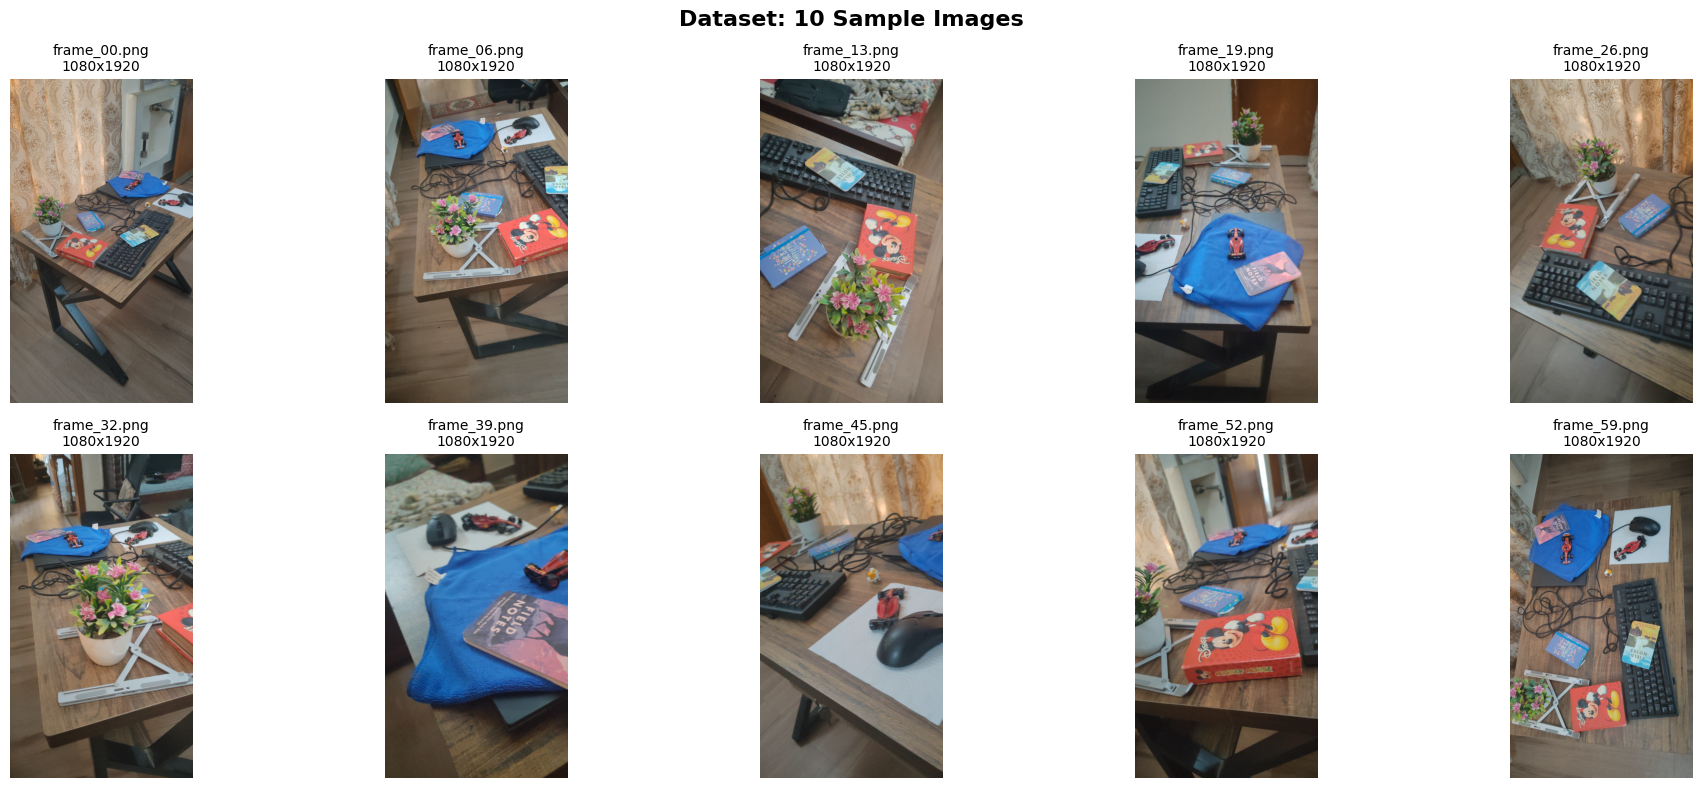

In [30]:
num_display = 10
indices = np.linspace(0, len(preprocessed_images)-1, num_display, dtype=int)

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, idx in enumerate(indices):
    img = preprocessed_images[idx]
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes[i].imshow(img_rgb)
    axes[i].set_title(f'{frame_files[idx]}\n{img.shape[1]}x{img.shape[0]}', fontsize=10)
    axes[i].axis('off')

plt.suptitle('Dataset: 10 Sample Images', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

### **Step #4 - Feature Matching**

For our workflow, we picked SIFT (Scale-Invariant Feature Transform) over ORB (Orientated FAST and Robust BRIEF) simply because we want to prioritize accuracy and robustness over speed. Since each image in the dataset can contain rotations, scaling and changing in lighting, choosing SIFT over ORB becomes an obvious choice as the former will allow robust and fine-grained feature matching and help us have a strong foundation for the eventual 3D reconstruction.

Feature matching is performed on consecutive frames as they have maximum overlap and minimal camera motion, making feature matching more reliable. This sequential matching forms the foundation for incremental SfM, where we'll build up the 3D reconstruction by adding one camera at a time based on its relationship with previous views.


Pair 6: frame_05.png <-> frame_06.png
Keypoints detected: 4427 in image 1, 4215 in image 2
Raw matches: 4427
Good matches (after Lowe's ratio test): 517


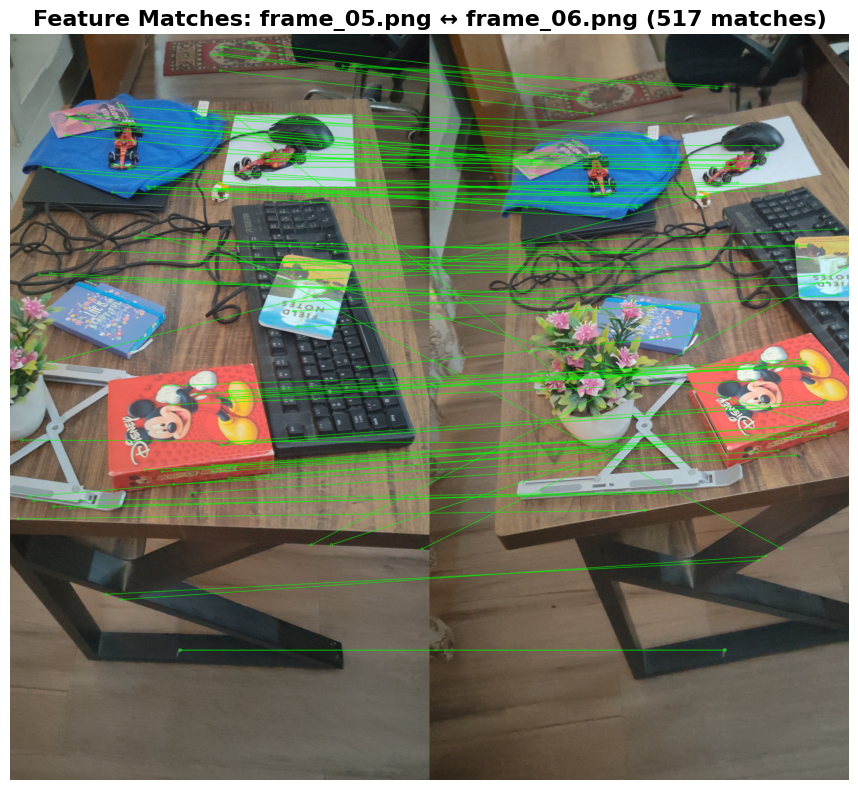


Pair 7: frame_06.png <-> frame_07.png
Keypoints detected: 4215 in image 1, 4646 in image 2
Raw matches: 4215
Good matches (after Lowe's ratio test): 773


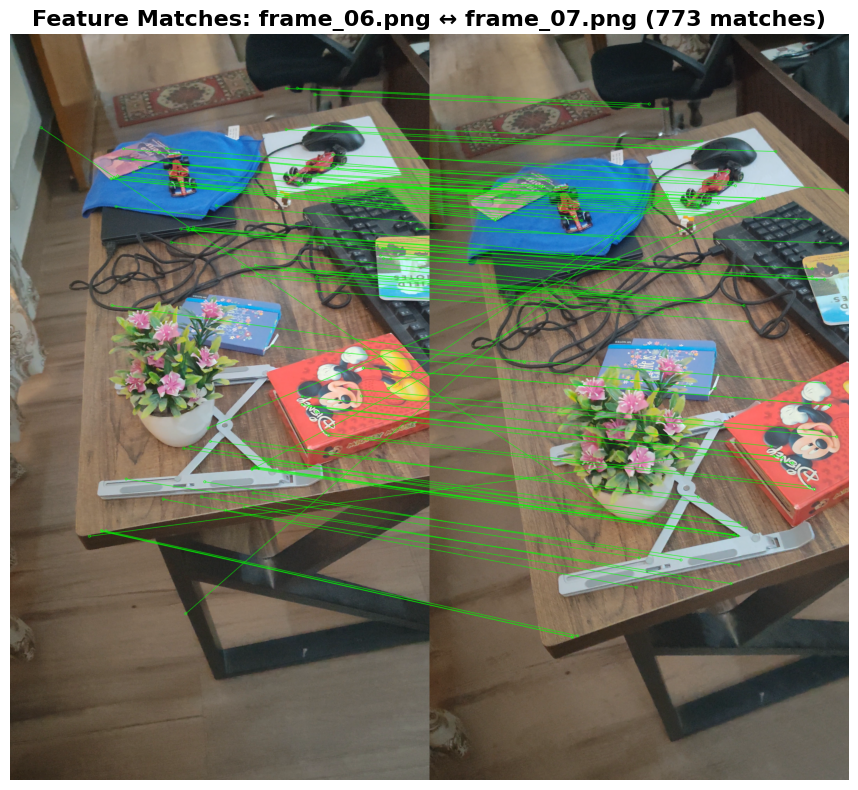


Pair 8: frame_07.png <-> frame_08.png
Keypoints detected: 4646 in image 1, 4363 in image 2
Raw matches: 4646
Good matches (after Lowe's ratio test): 508


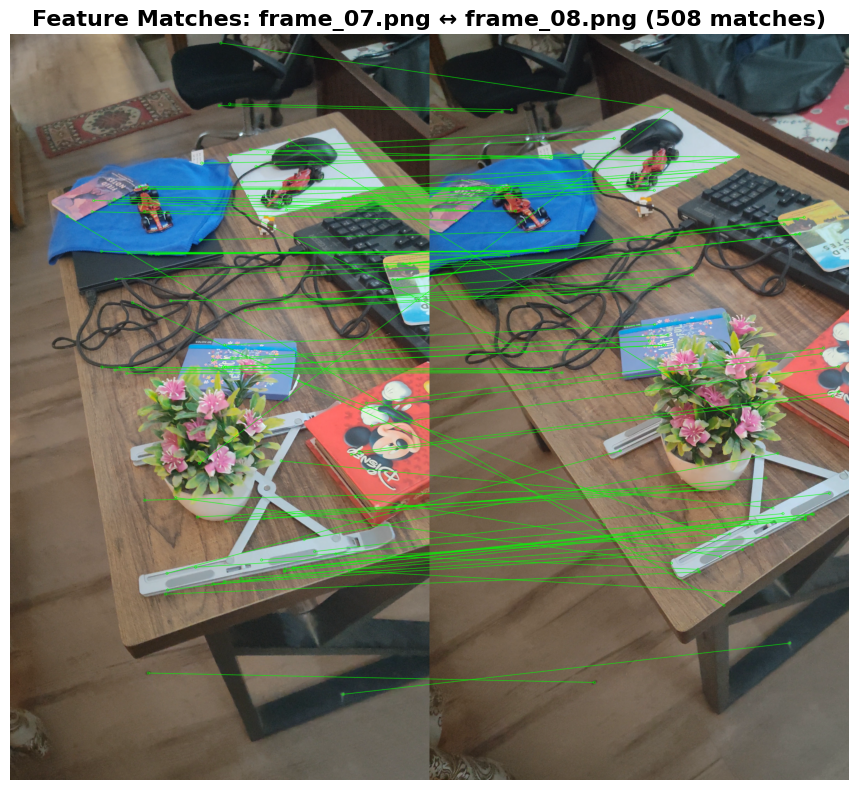


Pair 9: frame_08.png <-> frame_09.png
Keypoints detected: 4363 in image 1, 4590 in image 2
Raw matches: 4363
Good matches (after Lowe's ratio test): 950


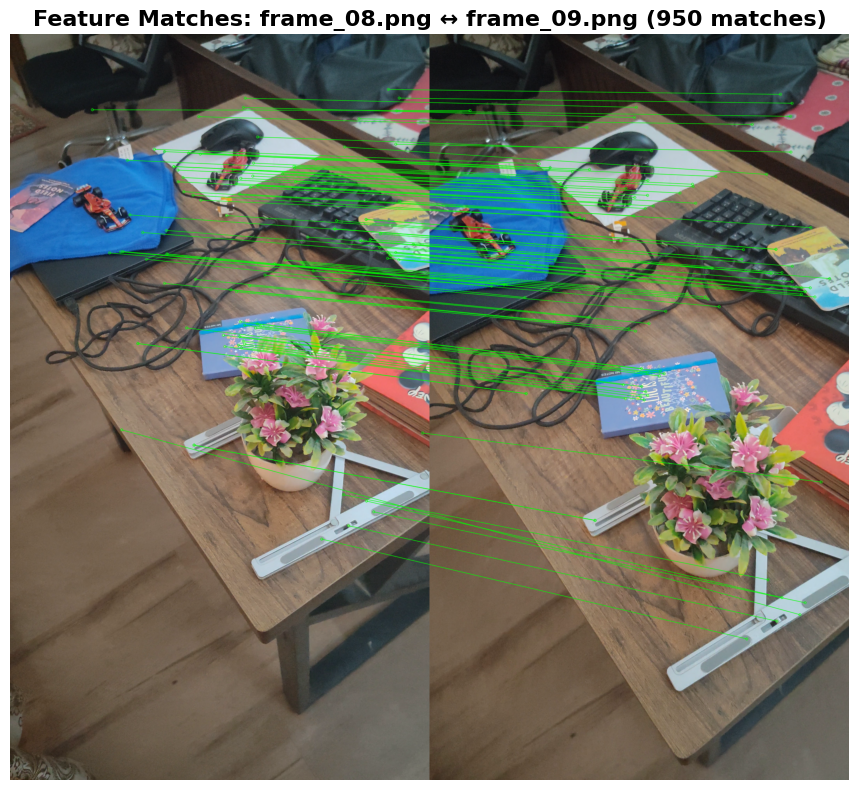


Pair 10: frame_09.png <-> frame_10.png
Keypoints detected: 4590 in image 1, 1475 in image 2
Raw matches: 4590
Good matches (after Lowe's ratio test): 319


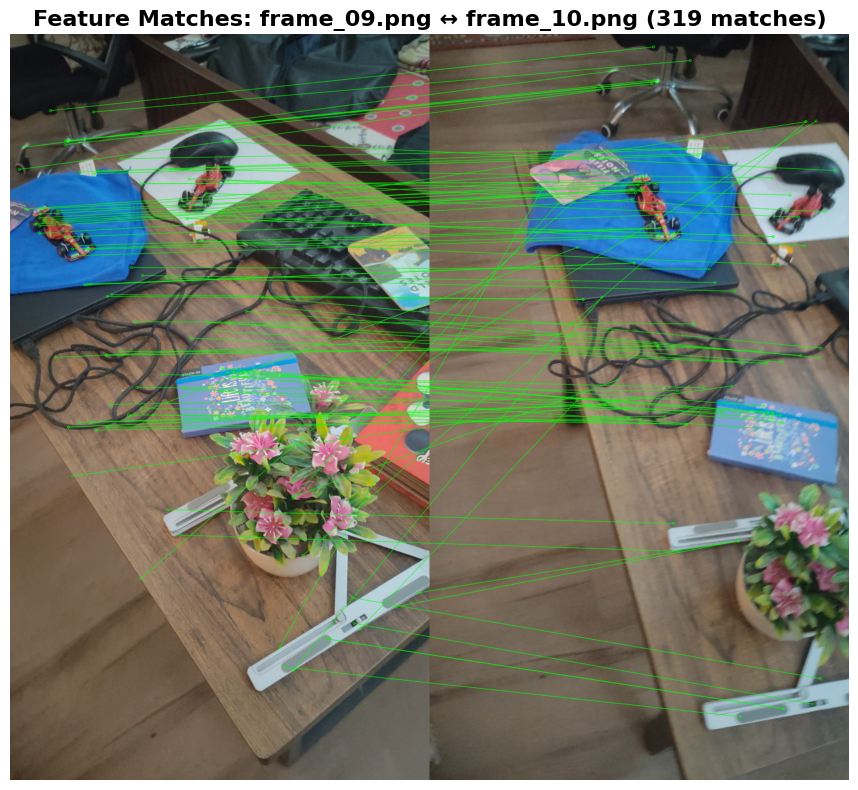

In [ ]:
# SIFT >>> ORB
sift = cv2.SIFT_create()

# showing 5 pairs (5 to 10)
for i in range(5, 10):
    img1 = preprocessed_images[i]
    img2 = preprocessed_images[i + 1]

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # detecting and computing features
    kp1, desc1 = sift.detectAndCompute(gray1, None)
    kp2, desc2 = sift.detectAndCompute(gray2, None)

    print(f"\nPair {i+1}: {frame_files[i]} <-> {frame_files[i+1]}")
    print(f"Keypoints detected: {len(kp1)} in image 1, {len(kp2)} in image 2")

    # matching features using BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
    matches = bf.knnMatch(desc1, desc2, k=2)

    # Lowe's ratio test
    ratio_thresh = 0.75
    good_matches = []
    for match_pair in matches:
        if len(match_pair) == 2:
            m, n = match_pair
            if m.distance < ratio_thresh * n.distance:
                good_matches.append(m)

    print(f"Raw matches: {len(matches)}")
    print(f"Good matches (after Lowe's ratio test): {len(good_matches)}")

    num_display = 100 # showing the best 100 matches
    good_matches_sorted = sorted(good_matches, key=lambda x: x.distance) # sorting by distance
    display_matches = good_matches_sorted[:num_display]

    match_img = cv2.drawMatches(
        img1, kp1, img2, kp2, display_matches, None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
        matchColor=(0, 255, 0),
        singlePointColor=(255, 0, 0)
    )

    plt.figure(figsize=(15, 8))
    plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Feature Matches: {frame_files[i]} ↔ {frame_files[i+1]} ({len(good_matches)} matches)',fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
